23337


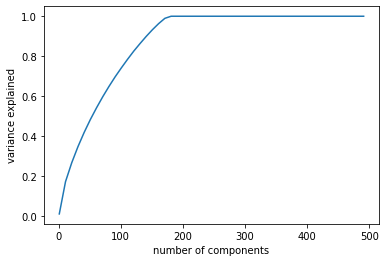

In [1]:
from gensim.models.phrases import Phraser
from joblib import load
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]






bigrams = Phraser.load('bigram_model.pkl')

tng_series_scripts_cleaned = pd.read_pickle('cleaned_tng_scripts.pkl')

tfidf_model = load('tfidf_model.pkl')


tfidf_episodes = tfidf_model.transform(tng_series_scripts_cleaned['text with bigrams'])

tfidf_episodes_frames = pd.DataFrame(tfidf_episodes.toarray())
print(len(tfidf_episodes_frames.columns))



# convert the vector space to LSA space with reduced dimensions


# lets find the optimal amount of dimensions
# that is, take as many dimensions as necessary to explain 95% of the variance in the data


explained_variance_sum = []
number_of_components = list(range(1,500,10))
for num_of_comps in number_of_components:
    svd = TruncatedSVD(n_components=num_of_comps, random_state=42).fit(tfidf_episodes)
    explained_variance_sum.append(svd.explained_variance_ratio_.sum())




plt.figure()
sns.lineplot(x=number_of_components, y=explained_variance_sum)
plt.xlabel('number of components')
plt.ylabel('variance explained')
plt.show()

# as we can see, 160 components/dimensions are necessary to explain 95% of the variance
# but that is still a massiv reduction from 23337 dimensions before.